### Pruebas de Normalidad
La distribución normal puede considerarse la distribución más importante en finanzas y uno de los principales pilares estadísticos de la teoría financiera. Entre otras, las siguientes piedras angulares de la teoría financiera se basan en gran medida en el supuesto de que los rendimientos de un instrumento financiero se distribuyen normalmente:
* Teoría de Portafolio
* Modelo de Valuación de Activos de Capital
* Hipótesis de Mercados Eficientes
* Teoría de Opciones de Precio

In [5]:
# Librerías
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [ ]:
# Función para generar muestra de Simulación Monte Carlo de Movimiento Browniano Geométrico 

Valor Esperado: 105.12710963760242 Media: 105.12645392478755


Text(0, 0.5, 'index level')

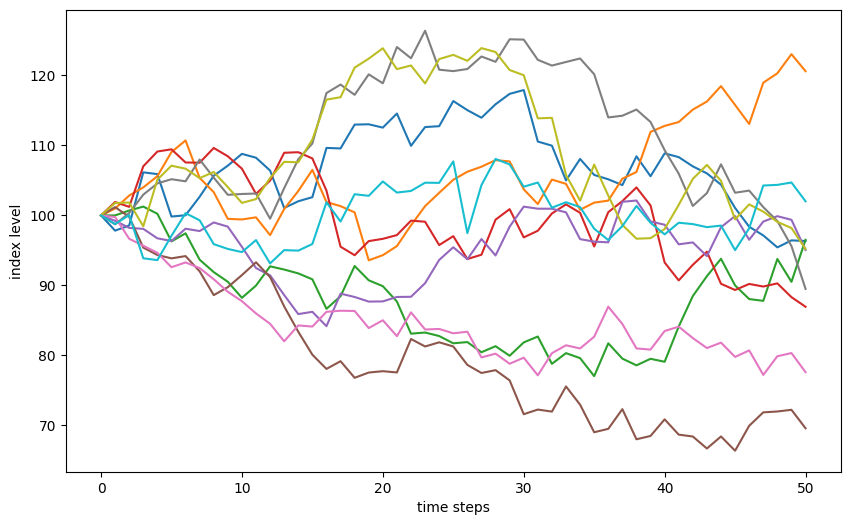

In [8]:
def gen_paths(S0, r, sigma, T, M, I):
# Generate Monte Carlo paths for geometric Brownian motion.
#     Parameters
#     ==========
#     S0: float
#         initial stock/index value
#     r: float
#         constant short rate
#     sigma: float
#         constant volatility
#     T: float
#         final time horizon
#     M: int
#         number of time steps/intervals
#     I: int
#         number of paths to be simulated
#     Returns
#     =======
#     paths: ndarray, shape (M + 1, I)
#         simulated paths given the parameters
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() # Coincidencia de 1er y 2do momento
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand) # Discretización de Euler vectorizada del movimiento browniano geométrico.
    return paths

S0 = 100. # Valor inicial del proceso
r = 0.05  # Tasa corta constante
sigma = 0.2 # Factor constante de volatilidad
T = 1.0 # Periodo de tiempo en fracciones de año
M = 50  # Número de intervalos de tiempo
I = 250000  # Número de procesos simulados
np.random.seed(1000)

paths = gen_paths(S0, r, sigma, T, M, I)
val_esp = S0 * math.exp(r * T) # Valor Esperado y Media de Valores simulados
media = paths[-1].mean() # Valor Esperado y Media de Valores simulados
print("Valor Esperado: " + str(val_esp) + " Media: " + str(media))

plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')


In [9]:
# Se simulan precios como si fueran datos reales de cotizaciones en Bolsa. 
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [10]:
# Dados los precios arriba generados, se obtienen sus Returns
log_returns = np.log(paths[1:] / paths[:-1])
log_returns[:, 0].round(4)

# Esto es algo que uno podría experimentar también en los mercados financieros:
# días en los que uno obtiene un rendimiento positivo de una inversión y
# otros días en los que uno está perdiendo dinero en relación con la posición de riqueza más reciente.

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [12]:
# La función print_statistics() es una función contenedora para la función
# scs.describe() del subpaquete scipy.stats. Principalmente genera una salida mejor legible (para humanos) 
# ara estadísticas como la media, la asimetría o la curtosis de un conjunto de datos determinado (histórico o simulado):
def print_statistics(array):
# ''' Prints selected statistics.
#                  Parameters
#                  ==========
#                  array: ndarray
#                      object to generate statistics on
#                  '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


Rend Logarit Medio: 0.05000000000000006 Volatilidad Anualizada: 0.20000000000000015


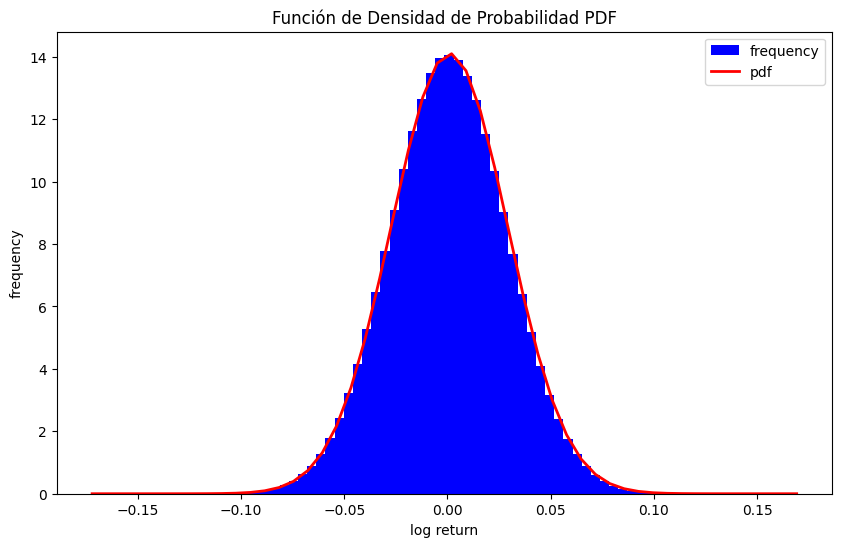

In [15]:
rend_log_medio = log_returns.mean() * M + 0.5 * sigma ** 2
vol_anual = log_returns.std() * math.sqrt(M)
print("Rend Logarit Medio: " + str(rend_log_medio) + " Volatilidad Anualizada: " + str(vol_anual))

# Se comparan los datos obtenidos con la Distribución Normal teórica
plt.figure(figsize = (10, 6))
plt.hist(log_returns.flatten(), bins = 70, density = True, label = 'frequency', color = 'b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc = r / M, scale = sigma / np.sqrt(M)), 'r', lw = 2.0, label = 'pdf')
plt.title("Función de Densidad de Probabilidad PDF")
plt.legend()

Text(0, 0.5, 'sample quantiles')

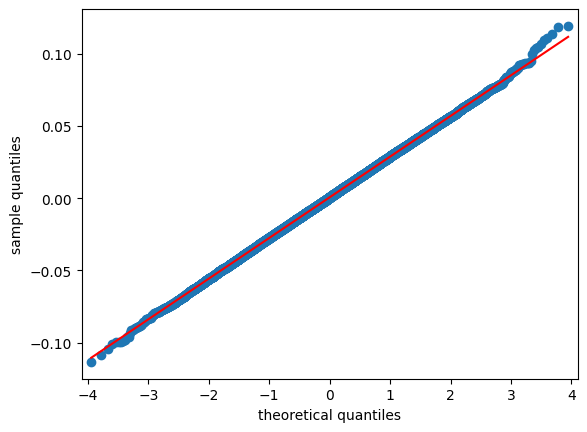

In [16]:
# Para continuar comparando los datos obtenidos con la Distribución teórica, se hace un QQ Plot (Quantil-Quantil)
sm.qqplot(log_returns.flatten()[::500], line = 's')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

# Por muy atractivos que puedan ser los enfoques gráficos,
# generalmente no pueden reemplazar los procedimientos de prueba más rigurosos.
# La función normality_tests() utilizada en el siguiente ejemplo combina tres pruebas estadísticas diferentes:
# Prueba de Asimetría o Sesgo: valor muy cercano a cero
# Prueba de Kurtosis: valor muy cercano a cero
# Prueba de Normalidad

In [17]:
# Prueba de Normalidad utilizando las pruebas anteriores de Asimetría y Kurtosis:
def normality_tests(arr):
# ''' Tests for normality distribution of given data set.
#                  Parameters
#                  ==========
#                  array: ndarray
#                      object to generate statistics on
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

normality_tests(log_returns.flatten())  # Los p-values deben estar por encima de 0.05

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5, 1.0, 'log data')

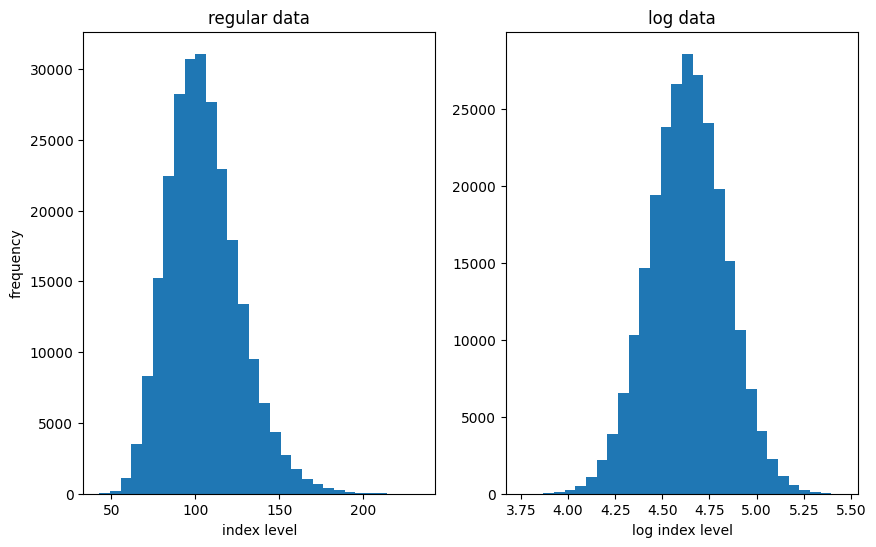

In [18]:
# Finalmente, se comprueba si los valores de final del período están realmente distribuidos de forma logarítmica normal.
# Esto se reduce a una prueba de normalidad, ya que solo hay que transformar los datos aplicándoles la función de registro
# para luego llegar a valores distribuidos normalmente (o tal vez no). La Figura 13-4 muestra tanto los valores de fin de período
# distribuidos logarítmicamente normalmente como los transformados (“nivel de índice logarítmico”):
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
ax1.hist(paths[-1], bins = 30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins = 30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

### Normalidad

El supuesto de normalidad con respecto a los rendimientos inciertos de los instrumentos financieros es fundamental para varias teorías financieras. Python proporciona medios estadísticos y gráficos eficientes para probar si los datos de series de tiempo se distribuyen normalmente o no.

Análisis de series financieras: 2 stocks de tecnología y 2 ETF:

[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

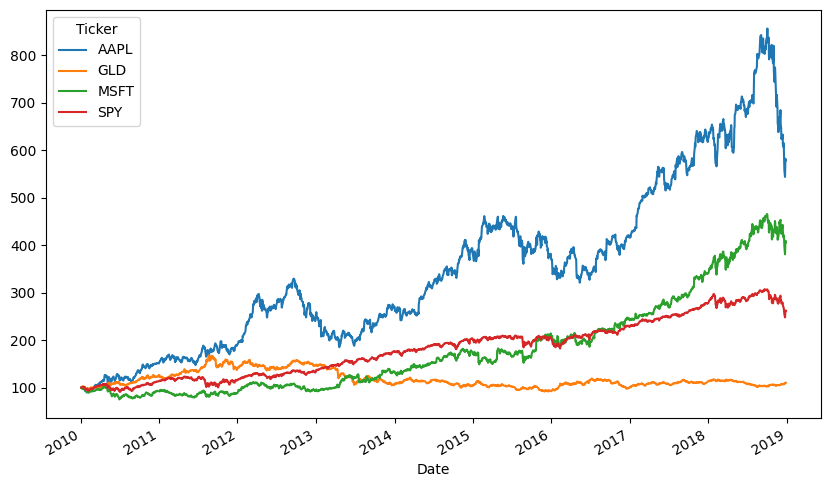

In [27]:
import pandas as pd ## 409
import yfinance as yf

symbols = ['SPY', 'GLD', 'AAPL', 'MSFT']
data = yf.download(symbols, start = "2010-01-01", end = "2018-12-31")
data = data['Adj Close']
data = data.dropna()

(data / data.iloc[0] * 100).plot(figsize = (10, 6))

In [28]:
# Retornos
log_returns = np.log(data / data.shift(1))
log_returns.head()

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001727,-0.000911,0.000323,0.002644
2010-01-06,-0.016034,0.016365,-0.006156,0.000704
2010-01-07,-0.001850,-0.006207,-0.010454,0.004212
2010-01-08,0.006626,0.004951,0.006873,0.003322


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'SPY'}>]], dtype=object)

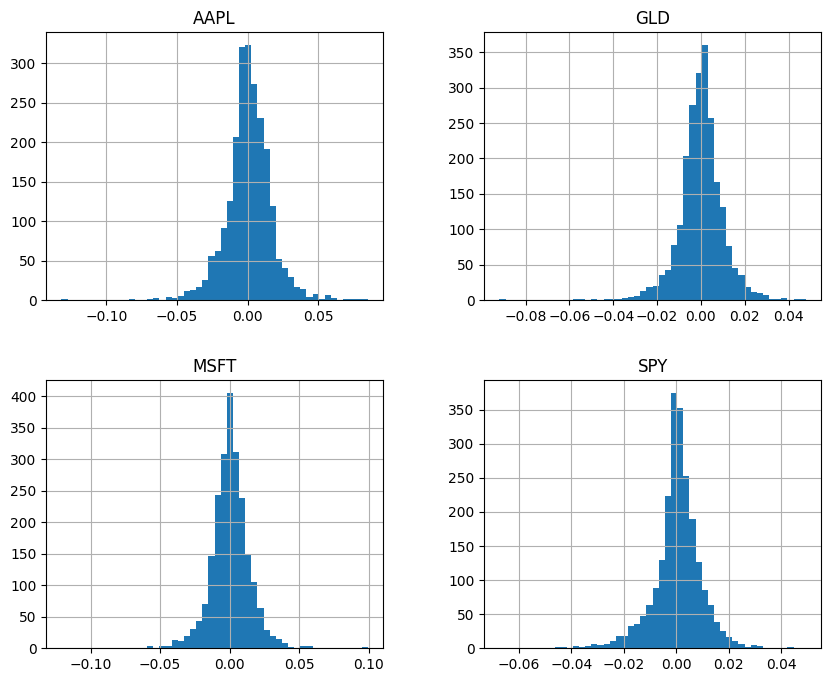

In [29]:
# Histograma para validar Normalidad
log_returns.hist(bins = 50, figsize = (10, 8))

In [30]:
# Se muestran Kurtosis aparentemente lejos de ser Normales ya que hay mucha cola
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      2262.00000
           min        -0.06734
           max         0.04929
          mean         0.00043
           std         0.00941
          skew        -0.49377
      kurtosis         4.53117

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      2262.00000
           min        -0.09191
           max         0.04787
          mean         0.00004
           std         0.01002
          skew        -0.59201
      kurtosis         5.84958

Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size      2262.00000
           min        -0.13188
           max         0.08502
          mean         0.00078
           std         0.01620
          skew        -0.24974
      kurtosis         4.485

Text(0, 0.5, 'sample quantiles')

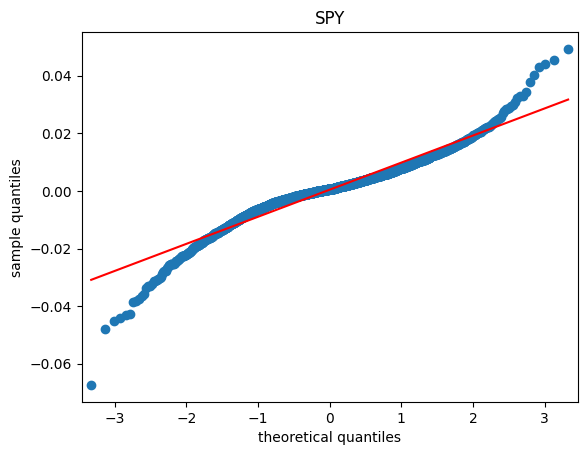

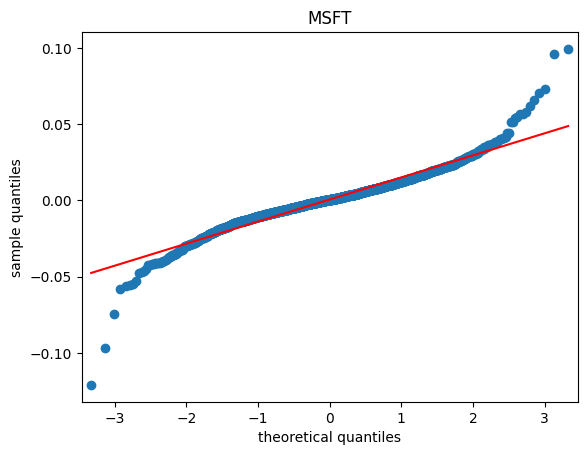

In [33]:
# Mostrar QQ Plots
# No se ajustan a una Línea Recta los valores azules (Valores quantiles muestrales), lo cual indica "No Normalidad" 
sm.qqplot(log_returns['SPY'].dropna(), line = 's')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
sm.qqplot(log_returns['MSFT'].dropna(), line = 's')
plt.title('MSFT')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [34]:
# Prueba de Normalidad para los activos financieros
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)

# Los "p-values" de las diferentes pruebas "son todos cero", lo que rechaza firmemente la hipótesis de la prueba de que los diferentes conjuntos de datos muestrales
# se distribuyen normalmente. Esto muestra que el supuesto normal para los rendimientos del mercado de valores y otras clases de activos
# (como, por ejemplo, el modelo geométrico de movimiento browniano) no puede justificarse en general y que podría ser necesario utilizar modelos más ricos
# que sean capaces de generar colas gruesas ( ej., modelos de difusión por salto o modelos con volatilidad estocástica).


Results for symbol SPY
--------------------------------
Skew of data set         -0.494
Skew test p-value          0.000
Kurt of data set          4.531
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.592
Skew test p-value          0.000
Kurt of data set          5.850
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL
--------------------------------
Skew of data set         -0.250
Skew test p-value          0.000
Kurt of data set          4.486
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set         -0.091
Skew test p-value          0.076
Kurt of data set          6.725
Kurt test p-value          0.000
Norm test p-value          0.000


### Optimización de Portafolio

La teoría de cartera moderna o de varianza media es una piedra angular importante de la teoría financiera. Sobre la base de este avance teórico, se otorgó el Premio Nobel de Economía a su inventor, Harry Markowitz, en 1990. Aunque se formuló en la década de 1950, sigue siendo una teoría que se enseña a los estudiantes de finanzas y se aplica en la práctica hoy en día (a menudo con algunas modificaciones menores o mayores).

[*********************100%%**********************]  4 of 4 completed


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'SPY'}>]], dtype=object)

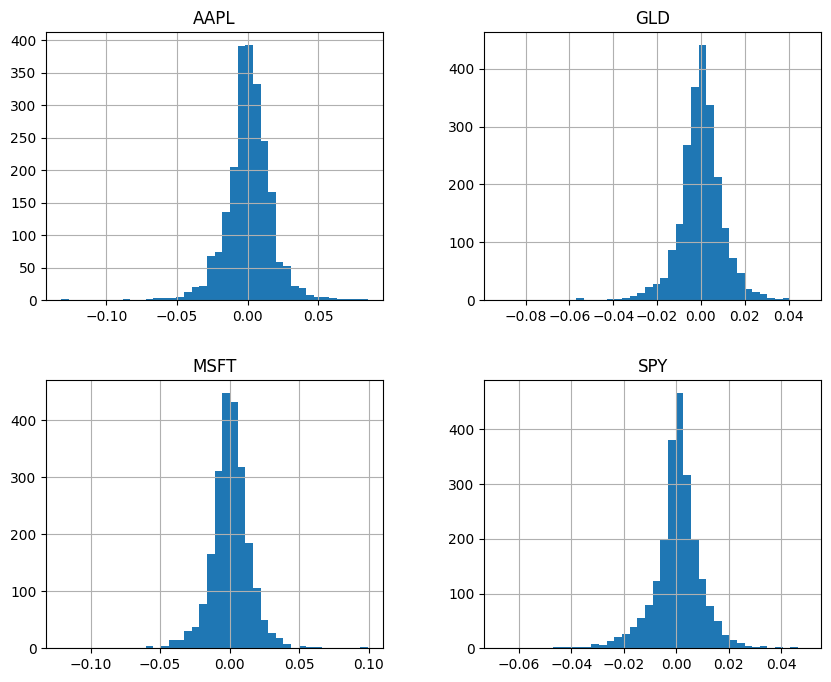

In [36]:
# Los Datos se centran en los 4 activos previemente empleado en symbols
symbols = ['AAPL', 'MSFT', 'SPY', 'GLD']
noa = len(symbols)
data = yf.download(symbols, start = "2010-01-01", end = "2018-12-31")
data = data['Adj Close']
data = data.dropna()
rets = np.log(data / data.shift(1))
rets.hist(bins = 40, figsize = (10, 8))

In [38]:
# La "matriz de covarianza" de los instrumentos financieros en los que se invertirá es la pieza central del proceso de selección de cartera
rets.mean() * 252 # Media de retornos anualizada

Ticker
AAPL    0.195567
GLD     0.010876
MSFT    0.156126
SPY     0.107322
dtype: float64

In [39]:
rets.cov() * 252 # Matriz de Covarianza Anualizada

Ticker,AAPL,GLD,MSFT,SPY
Ticker,,,,
AAPL,0.066140,0.001237,0.026169,0.022292
GLD,0.001237,0.025291,-0.000575,-0.000016
MSFT,0.026169,-0.000575,0.052930,0.023518
SPY,0.022292,-0.000016,0.023518,0.022323


### Teoría Básica de Portafolios

Se supone que a un inversor no se le permite establecer "posiciones cortas" en un instrumento financiero. Sólo se permiten "posiciones largas", lo que implica que el 100% de la riqueza del inversor tiene que dividirse entre los instrumentos disponibles de tal forma que todas las posiciones sean largas (positivas) y que las posiciones sumen el 100%. Dados los cuatro instrumentos, se podrían, por ejemplo, invertir cantidades iguales en cada uno de ellos, es decir, el 25% de la riqueza disponible en cada uno. El siguiente código genera cuatro números aleatorios distribuidos uniformemente entre 0 y 1 y luego normaliza los valores de modo que la suma de todos los valores sea igual a 1.

In [49]:
# Modelo de Portafolio
weights = np.random.random(noa) # Pesos del portafolio aleatorios (generados con Distribución Uniforme)
weights /= np.sum(weights)      # Normalizados de 1 a 100
print("Pesos: " + str(weights) + " Total: " + str(weights.sum()))

Pesos: [0.22187501 0.29149577 0.41008394 0.07654527] Total: 1.0


Como se verifica aquí, los pesos suman 1; es decir, $\sum_I w_i=1$, donde $I$ es el número de instrumentos financieros y $w_i > 0$ es el peso del instrumento financiero $i$. La sig. ecuación proporciona la fórmula para el "Rendimiento Esperado" de la cartera dadas las ponderaciones de los instrumentos individuales. Se trata de un rendimiento esperado de la cartera en el sentido de que se supone que el rendimiento medio histórico es el mejor estimador del rendimiento futuro (esperado). Aquí, los $r_i$ son los rendimientos futuros dependientes del estado (vector con valores de rendimiento que se supone están distribuidos normalmente) y $\mu_i$ es el rendimiento esperado para el instrumento $i$. Finalmente, $w^T$ es la transpuesta del vector de ponderaciones y $\mu$ es el vector de los rendimientos esperados de los valores.

### Fórmula General para el Retorno Esperado del Portafolio
$\mu_p=\textbf{E}(\displaystyle \sum_I w_i r_i)=\sum_I w_i \textbf{E}(r_i)=\sum_I w_i \mu_i=w^T\mu$

In [51]:
# En Python: para "Rentabilidad anualizada de la cartera dadas todas sus ponderaciones"
RentabilidadEsperada = np.sum(rets.mean() * weights) * 252
print("Rentabilidad Esperada Anualizada de la Cartera: " + str(RentabilidadEsperada))

Rentabilidad Esperada Anualizada de la Cartera: 0.11880138832896578


## Matriz de Covarianza del Portafolio
El segundo objeto de importancia en MPT es la "Variación Esperada de la Cartera". La covarianza entre dos valores. La varianza de un valor es el caso especial de la covarianza consigo mismo. Se proporciona la matriz de covarianza para una cartera de valores (suponiendo un peso igual de 1 para cada valor).

### Fórmula General de la Varianza Esperada del Portafolio
$\sigma_p^2=\textbf{E}((r-\mu)^2)=\displaystyle \sum_{i\in I} \sum_{j\in I} w_i w_j \sigma_{ij}=w^T \sum w$

In [52]:
# En Python:
var = np.dot(weights.T, np.dot(rets.cov() * 252, weights)) # Varianza Anualizada del Portafolio
vol = math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  # Volatilidad Anualizada del Portafolio
print("Varianza Anualizada del Portafolio: " + str(var) + " Volatilidad Anualizada del Portafolio: " + str(vol))

Varianza Anualizada del Portafolio: 0.02145466204464963 Volatilidad Anualizada del Portafolio: 0.14647410025205695


Esto completa principalmente el conjunto de herramientas para la selección de carteras de media varianza. De suma importancia para los inversores es qué perfiles riesgo-retorno son posibles para un conjunto determinado de instrumentos financieros y sus características estadísticas. Con este fin, a continuación se implementa una simulación de Monte Carlo para generar vectores de ponderación de cartera aleatorios a mayor escala. Para cada asignación simulada, el código registra el rendimiento y la variación esperados de la cartera resultantes. Para simplificar el código, se definen dos funciones, port_ret() y port_vol():

In [53]:
# Función para obtener el Retorno Esperado del Portafolio
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252
# Función para obtener la Volatilidad del Portafolio
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

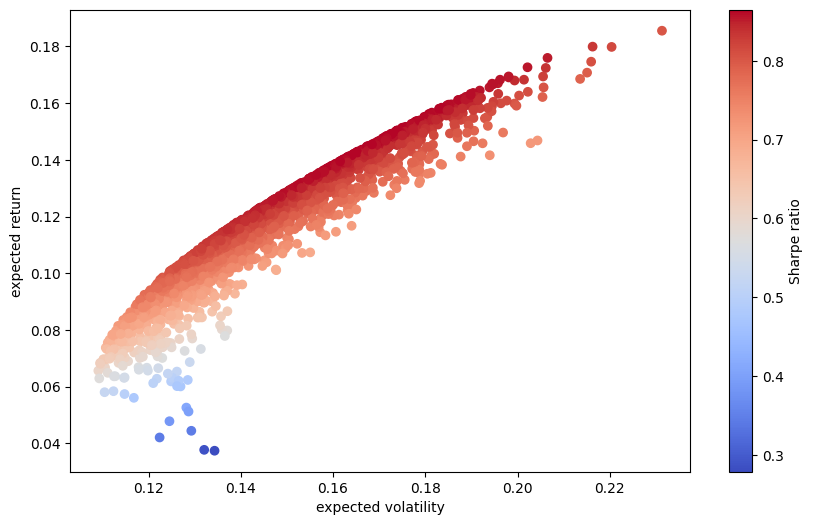

In [55]:
prets = []
pvols = []
for p in range (2500):               # Simulación Monte Carlo para encontrar los pesos del Portafolio
    weights = np.random.random(noa)  # Simulación Monte Carlo para encontrar los pesos del Portafolio
    weights /= np.sum(weights)       # Simulación Monte Carlo para encontrar los pesos del Portafolio
    prets.append(port_ret(weights))  # Obtener los datos estadísticos del Portafolio
    pvols.append(port_vol(weights))  # Obtener los datos estadísticos del Portafolio
prets = np.array(prets)
pvols = np.array(pvols)


plt.figure(figsize = (10, 6))
plt.scatter(pvols, prets, c = prets / pvols, marker = 'o', cmap = 'coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')


# Al examinar la Figura 13-13, queda claro que no todas las distribuciones de ponderación funcionan bien cuando se miden en términos de media y volatilidad.
# Por ejemplo, para un nivel de riesgo fijo de, digamos, 15%, existen múltiples carteras y todas muestran rendimientos diferentes.
# Como inversor, uno generalmente está interesado en el rendimiento máximo dado un nivel de riesgo fijo o en el riesgo mínimo dada una expectativa de rendimiento fija.
# Este conjunto de carteras conforma entonces la llamada frontera eficiente. Esto se deriva más adelante en esta sección.